In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
data_dir = (r'C:\Users\admin\Training\Datasets\Brain tumor\Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

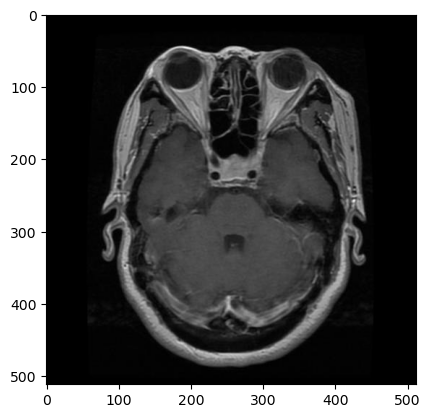

In [9]:
plt.imshow(img_array);

In [10]:
img_array.shape

(512, 512, 3)

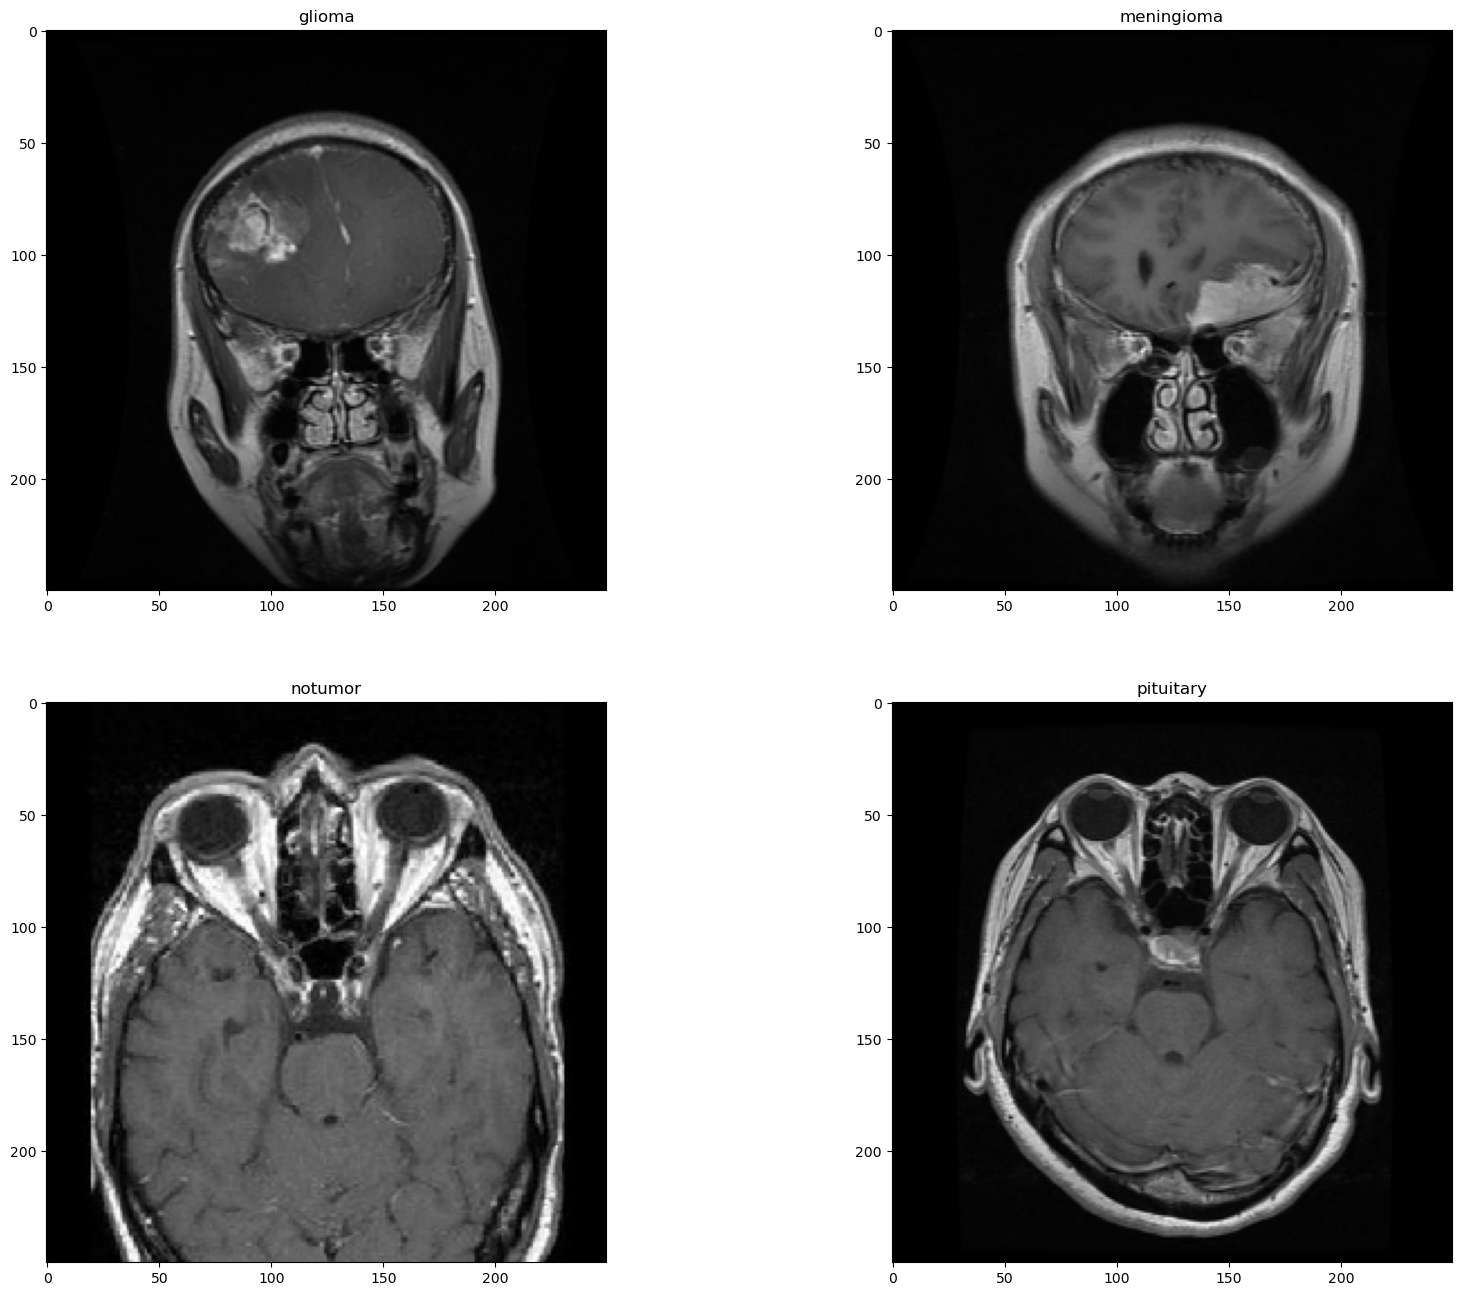

In [11]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

In [12]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [13]:
training_set = train_data_gen.flow_from_directory(directory=r"C:\Users\admin\Training\Datasets\Brain tumor\Training",
                                                  target_size=(224,224),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 5712 images belonging to 4 classes.


In [14]:
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [15]:
validation_set = validation_data_gen.flow_from_directory(directory=r"C:\Users\admin\Training\Datasets\Brain tumor\Testing",
                                                        target_size=(224,224),
                                                        class_mode='categorical',
                                                        batch_size=32)

Found 1311 images belonging to 4 classes.


In [16]:
img, label = next(training_set)

In [17]:
print(label)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [18]:
img.size

4816896

In [19]:
label.size

128

In [20]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape= (224,224,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model_history = model.fit(x=training_set,validation_data=validation_set,epochs=10,verbose=1)

Epoch 1/10
179/179 [==============================] - 239s 1s/step - loss: 0.3317 - accuracy: 0.8741 - val_loss: 0.3730 - val_accuracy: 0.8337
Epoch 2/10
179/179 [==============================] - 240s 1s/step - loss: 0.3311 - accuracy: 0.8713 - val_loss: 0.3309 - val_accuracy: 0.8581
Epoch 3/10
179/179 [==============================] - 231s 1s/step - loss: 0.3175 - accuracy: 0.8820 - val_loss: 0.3045 - val_accuracy: 0.8658
Epoch 4/10
179/179 [==============================] - 222s 1s/step - loss: 0.3129 - accuracy: 0.8848 - val_loss: 0.3329 - val_accuracy: 0.8604
Epoch 5/10
179/179 [==============================] - 224s 1s/step - loss: 0.3044 - accuracy: 0.8864 - val_loss: 0.3280 - val_accuracy: 0.8673
Epoch 6/10
179/179 [==============================] - 226s 1s/step - loss: 0.2907 - accuracy: 0.8885 - val_loss: 0.3261 - val_accuracy: 0.8703
Epoch 7/10
179/179 [==============================] - 221s 1s/step - loss: 0.2904 - accuracy: 0.8906 - val_loss: 0.2883 - val_accuracy: 0.8856

In [23]:
model.fit(x = training_set, validation_data=validation_set, epochs = 5, verbose = 1)

Epoch 1/5
179/179 [==============================] - 281s 2s/step - loss: 0.9601 - accuracy: 0.5749 - val_loss: 0.8822 - val_accuracy: 0.6644
Epoch 2/5
179/179 [==============================] - 308s 2s/step - loss: 0.7273 - accuracy: 0.7134 - val_loss: 0.8191 - val_accuracy: 0.6545
Epoch 3/5
179/179 [==============================] - 253s 1s/step - loss: 0.6210 - accuracy: 0.7523 - val_loss: 0.5713 - val_accuracy: 0.7590
Epoch 4/5
179/179 [==============================] - 246s 1s/step - loss: 0.5694 - accuracy: 0.7822 - val_loss: 0.5895 - val_accuracy: 0.7414
Epoch 5/5
179/179 [==============================] - 270s 2s/step - loss: 0.5466 - accuracy: 0.7934 - val_loss: 0.5298 - val_accuracy: 0.7628


In [117]:
model.save('brain_tumor1.h5')

In [147]:
model.history.keys()

AttributeError: 'History' object has no attribute 'keys'

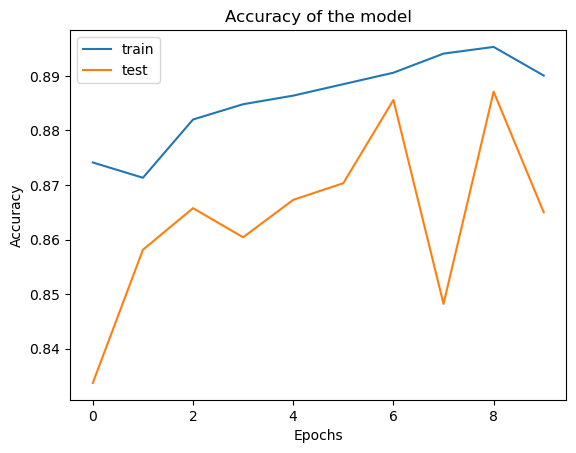

In [105]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

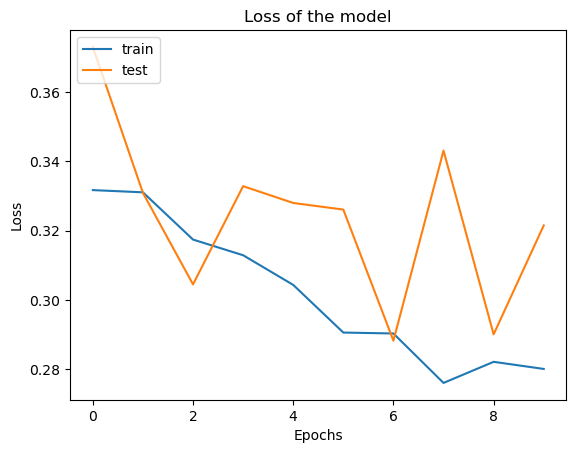

In [106]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

# model 2

In [135]:
model2 = Sequential()

model2.add(Conv2D(32,(3,3), activation = 'relu', input_shape=[224,224,3]))
model2.add(Conv2D(32,(3,3), activation = 'relu'))
model2.add(MaxPooling2D((2,2),strides=2 , padding='valid'))

model2.add(Conv2D(32,(3,3), activation = 'relu'))
model2.add(Conv2D(64,(3,3), activation = 'relu'))
model2.add(MaxPooling2D((2,2),strides=2 , padding='valid'))

model2.add(Flatten())

model2.add(Dense(32, activation ='relu', use_bias = True))
model2.add(Dropout(0.4))
model2.add(Dense(16, activation = 'relu', use_bias = True))
model2.add(Dense(4, activation = 'softmax'))

In [136]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_30 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_32 (Conv2D)          (None, 106, 106, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 53, 53, 64)       0         
 g2D)                                                

In [140]:
# tf.keras.utils.plot_model(model2, show_shapes=True)

In [144]:
early = EarlyStopping(monitor = 'val_acc',
                      min_delta = 0,
                      patience = 5,
                      verbose = 1,
                      mode = 'auto')

In [142]:
model2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
model2.fit(x = training_set, validation_data=validation_set, epochs = 5, verbose = 1, callbacks=[early])

Epoch 1/5
179/179 [==============================] - 605s 3s/step - loss: 1.0149 - accuracy: 0.5539 - val_loss: 1.0663 - val_accuracy: 0.5225
Epoch 2/5
179/179 [==============================] - 1554s 9s/step - loss: 0.8034 - accuracy: 0.6626 - val_loss: 0.7967 - val_accuracy: 0.6705
Epoch 3/5
179/179 [==============================] - 605s 3s/step - loss: 0.7245 - accuracy: 0.6989 - val_loss: 0.7278 - val_accuracy: 0.7201
Epoch 4/5
179/179 [==============================] - 600s 3s/step - loss: 0.6748 - accuracy: 0.7232 - val_loss: 0.6650 - val_accuracy: 0.6964
Epoch 5/5
179/179 [==============================] - 592s 3s/step - loss: 0.6581 - accuracy: 0.7341 - val_loss: 0.6126 - val_accuracy: 0.7513


In [197]:
df = pd.DataFrame(model2.history.history)
df.head()

""


In [190]:
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

KeyError: 'accuracy'

# Testing
___

In [5]:
index = ['glioma','meningioma','normal','adenoma']

# meningioma

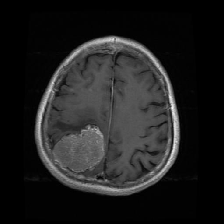

In [149]:
test_image1 = load_img(r'C:\Users\admin\Training\Datasets\Brain tumor\Testing\meningioma\Te-me_0150.jpg',target_size = (224,224))
test_image1

In [150]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(model2.predict(test_image1/255.0),axis=1)
print(result1)
print(index[result1[0]])

1/1 [==============================] - 0s 156ms/step
[1]
meningioma


# adenoma

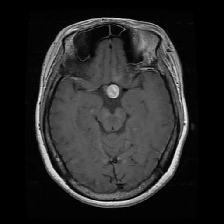

In [151]:
test_image1 = load_img(r'C:\Users\admin\Training\Datasets\Brain tumor\Testing\pituitary\Te-pi_0154.jpg',target_size = (224,224))
test_image1

In [152]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(model2.predict(test_image1/255.0),axis=1)
print(result1)
print(index[result1[0]])

1/1 [==============================] - 0s 47ms/step
[3]
adenoma


# glioma

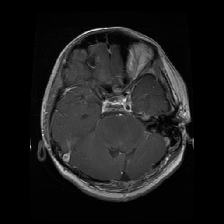

In [153]:
test_image1 = load_img(r'C:\Users\admin\Training\Datasets\Brain tumor\Testing\glioma\Te-gl_0010.jpg',target_size = (224,224))
test_image1

In [154]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(model2.predict(test_image1/255.0),axis=1)
print(result1)
print(index[result1[0]])

1/1 [==============================] - 0s 57ms/step
[3]
adenoma


# loading model

In [2]:
loaded_model = load_model(r'C:\Users\admin\Training\brain_tumor1.h5')

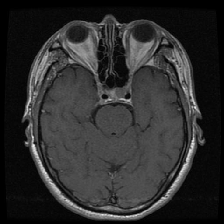

In [6]:
test_image1 = load_img(r'C:\Users\admin\Training\Datasets\Brain tumor\Testing\pituitary\Te-pi_0037.jpg',target_size = (224,224))
test_image1

In [7]:
test_image1 = img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(loaded_model.predict(test_image1/255.0),axis=1)
print(result1)
print(index[result1[0]])

1/1 [==============================] - 0s 56ms/step
[3]
adenoma


# confusion matrix

In [156]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory=r"C:\Users\admin\Training\Datasets\Brain tumor\Testing",
                                                        image_size=(224,224),
                                                        shuffle = True,
                                                        batch_size=32)

Found 1311 files belonging to 4 classes.


In [167]:
traing_ds = tf.keras.utils.image_dataset_from_directory(directory=r"C:\Users\admin\Training\Datasets\Brain tumor\Training",
                                                        image_size=(224,224),
                                                        shuffle = True,
                                                        batch_size=32)

Found 5712 files belonging to 4 classes.


In [163]:
# Make predictions on test set
predictions = model.predict(test_ds)
# We use tf.nn.softmax as we applied padding in training & task is of multiclass 
# prediction. Threfore, we used `SparseCategoricalCrossentropy` in model.compile()
scores = tf.nn.softmax(predictions[:])

41/41 [==============================] - 14s 318ms/step


In [169]:
class_names = traing_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [170]:
for i in range(10):
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(scores[i])], 100 * np.max(scores[i]))
    )

This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.
This image most likely belongs to notumor with a 47.54 percent confidence.


In [171]:
# Create two numpy arrays to store labels of test data and prediction 
# of respective image
y_test_actual = np.array([])
y_pred_actual = np.array([])

# Iterate over every batch and enter data in created numpy arrays
for x, y in test_ds:
    # Convert label tensor to numpy and concatenate
    y_test = np.array(y)
    y_test_actual = np.concatenate((y_test_actual, y_test))
    # Process prediction score and concatenate result
    predictions = model.predict(x)
    scores = tf.nn.softmax(predictions[:])
    y_pred = np.argmax(scores, axis=1)
    y_pred_actual = np.concatenate((y_pred_actual, y_pred))

1/1 [==============================] - 0s 293ms/step


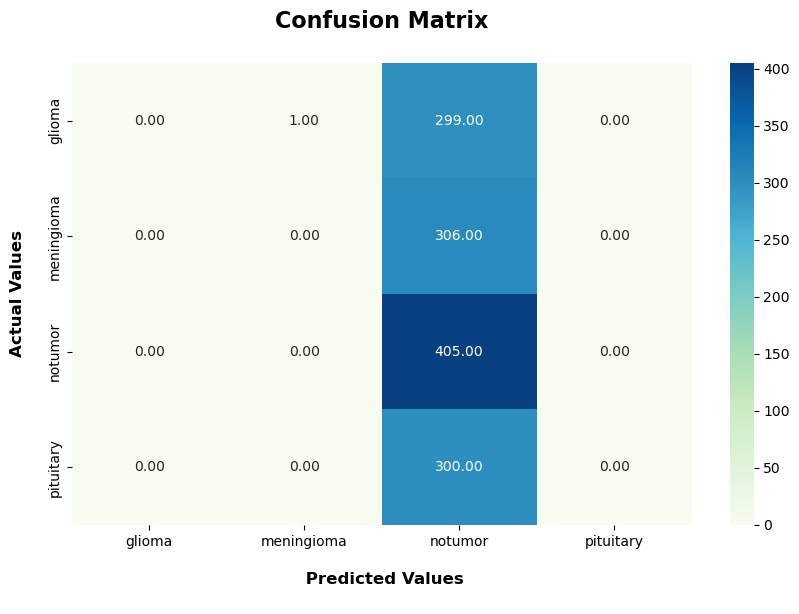

In [174]:
confusion = confusion_matrix(y_test_actual, y_pred_actual)
plt.figure(figsize=(10,6))
fig = sns.heatmap(confusion, annot=True, fmt=".2f",cmap="GnBu")

fig.set_title('Confusion Matrix\n',
              fontdict={
                  "fontsize":16,
                  "fontweight": 'bold'
              })
fig.set_xlabel('\n Predicted Values\n',
              fontdict={
                  "fontsize":12,
                  "fontweight": 'semibold'
              })
fig.set_ylabel('Actual Values\n',
              fontdict={
                  "fontsize":12,
                  "fontweight": 'semibold'
              })
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
plt.show()

In [175]:
# Get classification report
print(classification_report(y_test_actual, y_pred_actual, target_names=class_names))


              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       300
  meningioma       0.00      0.00      0.00       306
     notumor       0.31      1.00      0.47       405
   pituitary       0.00      0.00      0.00       300

    accuracy                           0.31      1311
   macro avg       0.08      0.25      0.12      1311
weighted avg       0.10      0.31      0.15      1311



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
